# Install Package requirement

In [ ]:
%pip install mne

# Combine files to read 

In [ ]:
#9/code/Steps/2-dataset_con_relax/Emotiv 30s EDF/S001/S001E01.edf
from glob import glob
import os
import mne
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#path='Data/train_test/'
path='../dataset/Emotiv 30s EDF/'
files_path_train=[]
files_path_test=[]
files_path_valid=[]

for i in range(1,31):
    name_Folder="S0"+f"{i:02}"
    folder=path+name_Folder+"/"
    for j in range(1,3):
        
        file=folder+name_Folder+"E"+f"{j:02}"+".edf"
        if j in [1]:
            
            files_path_train.append(file)
        else:
            files_path_test.append(file)
        
files_path_train=np.hstack(files_path_train)
files_path_test=np.hstack(files_path_test)
#files_path_valid=np.hstack(files_path_valid)


In [ ]:
files_path_test
files_mne=[mne.io.read_raw_edf(file_path,preload=True) for file_path in files_path_test]


In [ ]:
files_mne

# Reading files in (time domain)

# parameters :- 
r = duration of each epochs 
# arrays :-
1- train and test concentration epochs array <br>
2- train and test relax epochs array 

In [ ]:
def read_data(file_path,r):
    datax=mne.io.read_raw_edf(file_path,preload=True)
    datax.set_eeg_reference()
    datax.filter(l_freq=0,h_freq=45)
    # overlap meaning ex : second epochs over overlap with he first epochs 
    epochs=mne.make_fixed_length_epochs(datax,duration=r,overlap=0)
    
    epochs=epochs.get_data()
    return epochs #trials,channel,length

r=1 # duration of epochs 
x=int(60/r)
conc_epochs_array=[read_data(subject,r)[x:x*2,:,:] for subject in files_path_train]
relax_epochs_array=[read_data(subject,r)[x*2:,:,:] for subject in files_path_train]
conc_epochs_test= [read_data(subject,r)[x:x*2,:,:] for subject in files_path_test]
relax_epochs_test=[read_data(subject,r)[x*2:,:,:] for subject in files_path_test]


# arrays:-
1- train and test concentration label array <br>
2- train adn test relax label array

In [ ]:
conc_epochs_labels=[len(i)*[1] for i in conc_epochs_array]
relax_epochs_labels=[len(i)*[0] for i in relax_epochs_array]
conc_labels_test=[len(i)*[1] for i in conc_epochs_test]
relax_labels_test=[len(i)*[0] for i in relax_epochs_test]

clt=np.array(conc_epochs_labels)
rlt=np.array(relax_epochs_labels)
ct=np.array(conc_epochs_array)
rt=np.array(relax_epochs_array)

cl=np.array(conc_labels_test)
rl=np.array(relax_labels_test)
c=np.array(conc_epochs_test)
r=np.array(relax_epochs_test)



conc_epochs_labels=[len(i)*[1] for i in conc_epochs_array]
relax_epochs_labels=[len(i)*[0] for i in relax_epochs_array]
conc_labels_test=[len(i)*[1] for i in conc_epochs_test]
relax_labels_test=[len(i)*[0] for i in relax_epochs_test]

clt=np.array(conc_epochs_labels)
rlt=np.array(relax_epochs_labels)
ct=np.array(conc_epochs_array)
rt=np.array(relax_epochs_array)

cl=np.array(conc_labels_test)
rl=np.array(relax_labels_test)
c=np.array(conc_epochs_test)
r=np.array(relax_epochs_test)




<h1> Combine the Concentration and relax arraies </h1> 
For training and testing

In [ ]:
print("                Time Domain                  \n")
print("################## train(shape)#######################")

data_list=conc_epochs_array+relax_epochs_array
label_list=conc_epochs_labels+relax_epochs_labels
groups_list=[[i]*len(j) for i, j in enumerate(data_list)]

data_array=np.vstack(data_list)
label_array=np.hstack(label_list)
group_array=np.hstack(groups_list)
print("concenration and relax combine :\n 1- conc and relax epochs :%s\n 2- conc and relax labels :%s\n 3- conc and relax groups :%s  "
      %(data_array.shape,label_array.shape,group_array.shape))

print("################## test(shape)#######################")

data_list_test=conc_epochs_test+relax_epochs_test
label_list_test=conc_labels_test+relax_labels_test
groups_list_test=[[i]*len(j) for i, j in enumerate(data_list_test)]

data_array_test=np.vstack(data_list_test)
label_array_test=np.hstack(label_list_test)
group_array_test=np.hstack(groups_list_test)
print("concenration and relax combine :\n 1- conc and relax epochs :%s\n 2- conc and relax labels :%s\n 3- conc and relax groups :%s  "
      %(data_array_test.shape,label_array_test.shape,group_array_test.shape))






# Feature extraction : statistical features  
# arrays :-
1- train and test features 

In [ ]:
from scipy import stats
def mean(data):
    return np.mean(data,axis=-1)
def median(data):
    return np.median(data,axis=-1)
def corrcoef(data):
    return np.corrcoef(data)
def std(data):
    return np.std(data,axis=-1)

def ptp(data):
    return np.ptp(data,axis=-1)

def var(data):
    return np.var(data,axis=-1)

def minim(data):
      return np.min(data,axis=-1)


def maxim(data):
      return np.max(data,axis=-1)

def argminim(data):
      return np.argmin(data,axis=-1)


def argmaxim(data):
      return np.argmax(data,axis=-1)

def mean_square(data):
      return np.mean(data**2,axis=-1)

def rms(data): #root mean square
      return  np.sqrt(np.mean(data**2,axis=-1))  

def abs_diffs_signal(data):
    return np.sum(np.abs(np.diff(data,axis=-1)),axis=-1)


def skewness(data):
    return stats.skew(data,axis=-1)

def kurtosis(data):
    return stats.kurtosis(data,axis=-1)

def concatenate_features(data):
    return np.concatenate((median(data),mean(data),std(data),ptp(data),var(data),minim(data),maxim(data),argminim(data),argmaxim(data),
                          mean_square(data),rms(data),abs_diffs_signal(data),
                          skewness(data),kurtosis(data)),axis=-1)


## 10*4*1 = for concentration
## 10*4*1 = for relax
## 10*4*2=80  total 
## features = 13*14 =182 
# 13 = number of statistic 
# 14 = number of features
#from tqdm import tqdm_notebook
print("##################Features(shape)#######################")
features=[]
for data in (data_array):
    features.append(concatenate_features(data))
features=np.array(features)
print("train :",features.shape)

features_test=[]
for data in (data_array_test):
    features_test.append(concatenate_features(data))
features_test=np.array(features_test)
print("test  :",features_test.shape)



# Export to Train ,Test files 

In [ ]:
import pandas as pd
import numpy as np
#pd.DataFrame(features).to_csv('/content/drive/MyDrive/univ_s_project/The model/version_5/new_dataset/train.csv', index_label = "Index")
#pd.DataFrame(features_test).to_csv('/content/drive/MyDrive/univ_s_project/The model/version_5/new_dataset/test.csv', index_label = "Index")
for i in range(30):
  pd.DataFrame(features_test[60*i:60*(i+1)]).to_csv('new_dataset/test_conc'+str(i+1)+'.csv', index_label = "Index")
for i in range(30):
  pd.DataFrame(features_test[60*(i+30):60*(i+30+1)]).to_csv('new_dataset/test_relx'+str(i+1)+'.csv', index_label = "Index")

# Read features From the files

In [ ]:
features_test0=pd.read_csv('new_dataset/test_conc1.csv')
x=features_test0.iloc[:,2:]
x.head()

# Training
<br>

# Logistic Regression Regression

In [ ]:
from IPython.display import Image
Image(filename="doc_image/logisticRegression.png" ,width=700,height=400)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GroupKFold,GridSearchCV,cross_val_score,cross_validate 

clf=LogisticRegression()
gkf=GroupKFold(n_splits=5)
param_grid = {'classifier__C': [0.1,0.4,0.45,0.5,0.55,0.6]}
pipe=Pipeline([('scaler',StandardScaler()),('classifier',clf)])
logreg=GridSearchCV(pipe,param_grid,cv=gkf,n_jobs=16)
logreg.fit(features,label_array,groups=group_array)

In [ ]:
from sklearn.metrics import accuracy_score
y_pred_test=logreg.best_estimator_.predict(features_test)

print("Example of y pred output  :",y_pred_test[:10],"\n")
print('Training accuracy score   :', logreg.score(features, label_array)*100)
print("Testing accuracy score    :",accuracy_score([round(v) for v in y_pred_test],label_array_test)*100)
print("Best Parameters           :",logreg.best_params_)

#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
right_pred=0
wrong_pred=0
for i in range(len(features_test)):
    x=logreg.predict([features_test[i]])
    x=round(x[0])
    
    y=label_array_test[i]
    if x!=y:
        wrong_pred+=1
    elif x==y:
        right_pred+=1
        
print("right pred valid=",right_pred)
print("wrong pred valid=",wrong_pred)
print("precentage valid= %",(right_pred/(right_pred+wrong_pred))*100)

# Voting Regression

In [ ]:
from IPython.display import Image, HTML, display
import glob
# Get images path
images_path = []
for img_path in glob.glob("doc_image/voting_*.png"):
    images_path.append(img_path)
Image(filename=images_path[0] ,width=700,height=400)

<h1><b>Algorithms Used :-</b> </h1>
<br><h2><b>1-  Linear Regression<b></h2>

In [ ]:
Image(filename=images_path[1] ,width=700,height=400)

<h2><b>2-  Random Forest Regressor<b></h2>


In [ ]:
Image(filename=images_path[3] ,width=700,height=400)

<h2><b>3-  Gradient Boosting Regressor<b></h2>

> Indented block



In [ ]:
Image(filename=images_path[2] ,width=700,height=400)

In [ ]:
import matplotlib.pyplot as plt


from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression ,LogisticRegression
from sklearn.ensemble import VotingRegressor
# Train classifiers
reg3 = GradientBoostingRegressor(random_state=1)
reg2 = RandomForestRegressor(random_state=1)
reg1 = LinearRegression()
#reg4= LogisticRegression()
reg3.fit(features, label_array)
reg2.fit(features, label_array)
reg1.fit(features,label_array)
#reg4.fit(features,label_array)

voting = VotingRegressor([("gb", reg3), ("rf", reg2), ("lr", reg1)])#,("lor",reg4)])
voting.fit(features, label_array)


In [ ]:
reg3.predict([features_test[1]])

In [ ]:
print("Voting #################### ")
y_pred_test=voting.predict(features_test)
print("Example of y pred output  :",y_pred_test[:10],"\n")
print('Training accuracy score   :', voting.score(features, label_array)*100)
print("Testing accuracy score    :",accuracy_score([round(v) for v in y_pred_test],label_array_test)*100)
print("gradient##################")
y_pred_test=reg3.predict(features_test)
print('Training accuracy score   :', reg3.score(features, label_array)*100)
print("Testing accuracy score    :",accuracy_score([round(v) for v in y_pred_test],label_array_test)*100)
print("random Forest ############")
y_pred_test=reg2.predict(features_test)
print('Training accuracy score   :', reg2.score(features, label_array)*100)
print("Testing accuracy score    :",accuracy_score([round(v) for v in y_pred_test],label_array_test)*100)
print("Linear ###################")
y_pred_test=reg1.predict(features_test)
print('Training accuracy score   :', reg1.score(features, label_array)*100)
print("Testing accuracy score    :",accuracy_score([round(v) for v in y_pred_test],label_array_test)*100)
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
right_pred=0
wrong_pred=0
for i in range(len(features_test)):
    x=voting.predict([features_test[i]])
    x=round(x[0])
    
    y=label_array_test[i]
    if x!=y:
        wrong_pred+=1
    elif x==y:
        right_pred+=1
        
print("right pred valid=",right_pred)
print("wrong pred valid=",wrong_pred)
print("precentage valid= %",(right_pred/(right_pred+wrong_pred))*100)

# positive (true, false) : calculation :
accuracy detial

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from math import floor
models=[logreg,voting]
name_of_models=["Logistic regressor","voting"]
for k in range(len(models)):
    y_pred = models[k].predict(features_test)
    y_pred=[round(v) for v in y_pred]
    confmat = confusion_matrix(y_true=label_array_test, y_pred=y_pred)
    
    if name_of_models[k]=="voting":
      confmat=confmat[2:4,2:4]

    fig, ax = plt.subplots(figsize=(2.5, 2.5))
    ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(confmat.shape[0]):
        for j in range(confmat.shape[1]):
            ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
    
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.title(name_of_models[k])
    plt.tight_layout()
    plt.show()
#plt.savefig('images/06_09.png', dpi=300)


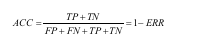

In [10]:
Image(filename='doc_image/acc.png' ,width=700,height=100)

In [ ]:
Image(filename='doc_image/confusion_matrix.png' ,width=250,height=250)

# Export models

In [ ]:
# Export Voting
models_to_export =[logreg,voting,reg3,reg2,reg1]
models_names=["Logistic regressor","voting regressor","GradientBoostingRegressor","RandomForestRegressor","LinearRegression"]
import pickle
import os
dest = 'pkl_objects'
if not os.path.exists(dest):
    os.mkdir(dest)
for i,v in enumerate(models_to_export):
    name=models_names[i]
    pickle.dump(v,open(os.path.join(dest, name+'.pkl'), 'wb'))